In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/inventory-analysis-case-study")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1


In [3]:
os.chdir('/home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1')

In [20]:
#Cargar datasets
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')

In [21]:
# Ver las dimensiones del dataset

print("Dimensiones de cada archivo:")
print("Inventario Inicial:", beg_inv.shape)
print("Inventario Final:", end_inv.shape)
print("Compras:", purchases.shape)
print("Facturas de Compras:", invoice_purchases.shape)
print("Precios de compras:", invoice_purchases.shape)
print("Ventas:", sales.shape)

Dimensiones de cada archivo:
Inventario Inicial: (206529, 9)
Inventario Final: (224489, 9)
Compras: (2372474, 16)
Facturas de Compras: (5543, 10)
Precios de compras: (5543, 10)
Ventas: (1048575, 14)


In [22]:
# Mostrar nombres de columnas y una vista previa de cada conjunto de datos para identificar inconsistencias
print("Columnas y primeras filas de cada archivo:")

print("Inventario Inicial:")
print(beg_inv.columns)
print(beg_inv.head(10))
print('beg_inv info: ')
print(beg_inv.info())
print('beg_inv null values: ')
print(beg_inv.isnull().sum())
print('beg_inv duplicated: ')
print(beg_inv.duplicated().value_counts())

print("Inventario Final:")
print(end_inv.columns)
print(end_inv.head(10))
print('end_inv info: ')
print(end_inv.info())
print('end_inv null values: ')
print(end_inv.isnull().sum())
print('end_inv duplicated: ')
print(end_inv.duplicated().value_counts())

print("Compras:")
print(purchases.columns)
print(purchases.head(10))
print('purchases info: ')
print(purchases.info())
print('purchases null values: ')
print(purchases.isnull().sum())
print('purchases duplicated: ')
print(purchases.duplicated().value_counts())

print("Facturas de Compras:")
print(invoice_purchases.columns)
print(invoice_purchases.head(10))
print('invoice_purchases info: ')
print(invoice_purchases.info())
print('invoice_purchases null values: ')
print(invoice_purchases.isnull().sum())
print('invoice_purchases duplicated: ')
print(invoice_purchases.duplicated().value_counts())

print("Precio de compras:")
print(purchase_prices.columns)
print(purchase_prices.head(10))
print('purchase_prices info: ')
print(purchase_prices.info())
print('purchase_prices null values: ')
print(purchase_prices.isnull().sum())
print('purchase_prices duplicated: ')
print(purchase_prices.duplicated().value_counts())

print("Ventas:")
print(sales.columns)
print(sales.head(10))
print('sales info: ')
print(sales.info())
print('sales null values: ')
print(sales.isnull().sum())
print('sales duplicated: ')
print(sales.duplicated().value_counts())

Columnas y primeras filas de cada archivo:
Inventario Inicial:
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
          InventoryId  Store          City  Brand  \
0   1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1   1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2   1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3   1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4   1_HARDERSFIELD_72      1  HARDERSFIELD     72   
5   1_HARDERSFIELD_75      1  HARDERSFIELD     75   
6   1_HARDERSFIELD_77      1  HARDERSFIELD     77   
7   1_HARDERSFIELD_79      1  HARDERSFIELD     79   
8  1_HARDERSFIELD_115      1  HARDERSFIELD    115   
9  1_HARDERSFIELD_120      1  HARDERSFIELD    120   

                   Description   Size  onHand  Price   startDate  
0  Gekkeikan Black & Gold Sake  750mL       8  12.99  2016-01-01  
1       Canadian Club 1858 VAP  750mL       7  10.99  2016-01-01  
2     Herradura Sil

In [23]:
#  De la exploración de los datos podemos observar:
# - Tanto inventario inicial como inventario final presentan las misma columnas.
# - Podemos observar que algunas tablas presentan valores faltantes.
# - El formato de fecha es diferente entre las tablas. La tabla "sales" tiene un formato m/d/yyyy, minetras
# las otras tablas presentan un formato yyyy/mm/dd
# - Se presentan inconsistencias en la columna "Size" de todas las tablas, ya que se utilizan diferentes unidades de medición.
# Por ejemplo, algunas tablas presentan un formato 750 mL, en otras Liter, en otras 1.75L, 375mL 2 Pk. Por tanto, es necesario
# unificar la unidad de medida.
# No hay valores duplicados.

# Manejo de valores faltantes:
#      En el inventario final la columna "City" presenta 1284 valores faltantes de 224489 entradas. Si comparamos las columnas "InventoryId"
# de las tablas de inventario inicial y final, podemos ver que los valores faltantes de la columna "City" del inventario final, se
# correponden con la tienda 46. Esta tienda se indica como 46_TYWARDREATH en la columna "InventoryId" presente en la tabla de inventario
# inicail. Por lo tanto, podemos rellenar los valores faltantes de las filas de la columna "City" con el nombre TYWARDREATH.
#      En la tabla compras, solo se presentan 3 vlaores faltantes en la columna "Size". Podemos eliminar estas filas o rellenarlas
#      En la tabla facturas de compra, se presentan 5169 valores faltantes de 5543 entradas. Son demasiados datos faltantes, por lo tanto
# podemos desestimar la columna y eliminarla.
#      En la tabla precio de compra, solo hay 1 valor faltante en cada una de las columnas "Description", "Size" y "Volume".
# Podemos eliminar las filas con los datos faltantes. Además, la comlumna "Volume" indica lo mismo que la columna "Size" por lo que
# sería de utilidad eliminar dicha columna. También se elimina la columna "Volume" de la tabla ventas.

In [24]:
# Manejo de datos faltantes

In [25]:
# Realizar copia del dataset
beg_inv_f = beg_inv.copy() 
end_inv_f = end_inv.copy()
purchases_f = purchases.copy()
invoice_purchases_f= invoice_purchases.copy()
purchase_prices_f = purchase_prices.copy()
sales_f = sales.copy()

In [26]:
# Rellenar datos faltantes en la columna "City" del inventario final
end_inv_f["City"] = end_inv_f["City"].fillna("TYWARDREATH")

# Eliminar filas con valores faltantes en "Size" en la tabla compras
purchases_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Approval" de la tabla facturas de compra
invoice_purchases_f = invoice_purchases_f.drop(['Approval'], axis=1)

# Eliminar valores faltantes de las columnas "Description" y "Size" de la tabla precios de compra
purchase_prices_f.dropna(subset=["Description"], inplace=True)
purchase_prices_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Volume" de la tabla precios de compra
purchase_prices_f = purchase_prices_f.drop(["Volume"], axis=1)
sales_f = sales_f.drop(["Volume"], axis = 1)


In [27]:
print('beg_inv_f columns:')
print(beg_inv_f.columns)
print('beg_inv_f null values: ')
print(beg_inv_f.isnull().sum().value_counts())

print('end_inv_f columns:')
print(end_inv_f.columns)
print('end_inv_f null values: ')
print(end_inv_f.isnull().sum().value_counts())

print('purchases_f columns:')
print(purchases_f.columns)
print('purchases_f null values: ')
print(purchases_f.isnull().sum().value_counts())

print('invoice_purchases_f columns:')
print(invoice_purchases_f.columns)
print('invoice_purchases_f null values: ')
print(invoice_purchases_f.isnull().sum().value_counts())

print('purchase_prices_f columns:')
print(purchase_prices_f.columns)
print('purchase_prices_f null values: ')
print(purchase_prices_f.isnull().sum().value_counts())

print('sales_f columns:')
print(sales_f.columns)
print('sales_f null values: ')
print(sales_f.isnull().sum().value_counts())

beg_inv_f columns:
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
beg_inv_f null values: 
0    9
Name: count, dtype: int64
end_inv_f columns:
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')
end_inv_f null values: 
0    9
Name: count, dtype: int64
purchases_f columns:
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')
purchases_f null values: 
0    16
Name: count, dtype: int64
invoice_purchases_f columns:
Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight'],
      dtype='object')
invoice_purchases_f null values: 
0    9
Name: count, dtype: int64
purch

In [28]:
# Estandarizar el formato de fecha
def format_time(df, *columns, date_format='%Y-%m-%d'):
  
    for col in columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Convierte a datetime
            df[col] = df[col].dt.strftime(date_format)          # Aplica formato
        except Exception as e:
            print(f"Error al procesar la columna {col}: {e}")
    return df


beg_inv_f = format_time(beg_inv_f, "startDate")
end_inv_f = format_time(end_inv_f, "endDate")
purchases_f = format_time(purchases_f, "PODate", "ReceivingDate", "InvoiceDate", "PayDate")
invoice_purchases_f = format_time(invoice_purchases_f, "InvoiceDate", "PODate", "PayDate")
sales_f = format_time(sales_f, "SalesDate")

In [29]:
# Eliminar espacios en todas las columnas tipo texto.
def strip_spaces(df):
   
    for col in df.select_dtypes(include=['object', 'string']).columns:
        df[col] = df[col].str.strip()
    return df

# Aplicar la función a cada archivo
beg_inv_f = strip_spaces(beg_inv_f)
end_inv_f = strip_spaces(end_inv_f)
purchases_f = strip_spaces(purchases_f)
invoice_purchases_f = strip_spaces(invoice_purchases_f)
sales_f = strip_spaces(sales_f)

# Confirmar que se eliminaron los espacios
print(beg_inv_f.head())
print(end_inv_f.head())
print(purchases_f.head())
print(invoice_purchases_f.head())
print(sales_f.head())

         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_60      1  HARDERSFIELD     60       Canadian Club 1858 VAP   
2  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
3  1_HARDERSFIELD_63      1  HARDERSFIELD     63   Herradura Reposado Tequila   
4  1_HARDERSFIELD_72      1  HARDERSFIELD     72         No. 3 London Dry Gin   

    Size  onHand  Price   startDate  
0  750mL       8  12.99  2016-01-01  
1  750mL       7  10.99  2016-01-01  
2  750mL       6  36.99  2016-01-01  
3  750mL       3  38.99  2016-01-01  
4  750mL       6  34.99  2016-01-01  
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake   
1  1_HARDERSFIELD_62      1  HARDERSFIELD     62     Herradura Silver Tequila   
2  1_HARDERSFIELD_63      1  HARDERSFIELD 

In [30]:
# Combinar las columnas "Size" de los DataFrames, ignorando las ausentes
data_frames = [beg_inv_f, end_inv_f, purchases_f, purchase_prices_f, sales_f]
all_sizes = pd.concat([df["Size"] for df in data_frames if "Size" in df.columns], ignore_index=True)

# Contar las ocurrencias únicas directamente con value_counts
size_counts = all_sizes.value_counts().reset_index()
size_counts.columns = ["Size", "Total Count"]

pd.set_option('display.max_rows', None)

# Mostrar el resultado
print(size_counts)

pd.reset_option('display.max_rows')

           Size  Total Count
0         750mL      2113362
1         1.75L       809721
2          1.5L       322129
3          50mL       195549
4         375mL       139094
5         Liter        73920
6            3L        71949
7            5L        69059
8    187mL 4 Pk        16693
9         500mL         9338
10           4L         8288
11        187mL         5023
12        100mL         3773
13        200mL         3386
14   100mL 4 Pk         2220
15    50mL 5 Pk         2215
16   250mL 4 Pk         2068
17    50mL 4 Pk         2056
18   200mL 4 Pk         1903
19        300mL         1687
20   187mL 3 Pk         1586
21        250mL          935
22    50mL 3 Pk          863
23        720mL          630
24   750mL 2 Pk          628
25       5.0 Oz          607
26   375mL 2 Pk          544
27      3/100mL          514
28   750mL + 1/          491
29       1500mL          486
30   200mL 3 Pk          479
31       1750mL          433
32       1000mL          427
33        330m

In [31]:
# Podemos observar que hay 76 diferentes tipos de medidas para expresar el volumen.
# Se observan diferentes expresiones de medidas de volumen.
#   - Para referenciar litro encontramos referencias como: Liter, L o l.
#   - Se observan volúmenes expresados en Oz.
#   - Hay otros patrones como 750mL, 375mL 2 Pk, 25.0, etc.
# 
# Debemos estandarizar la medida de volumen

In [32]:
import re

# Función para estandarizar las medidas de volumen en mililitros (mL)
def convert_to_milliliters(size):
    size = str(size).lower()
    
    # Manejo del caso "3/100ml" y "5/2 oz"
    if "3/100ml" in size: 
        return 3 * 100  # 3/100ml → 3 paquetes de 100ml
    elif '5/2 oz' in size: 
        return round(10 * 29.5735, 2)  # 5/2 oz → 10 onzas (1/2 * 5)

    # Convertir galones a mililitros
    elif 'gal' in size:
        gal_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(gal_value * 3785.41, 2)  # 1 gal = 3785.41 mL

    # Manejar patrones como "750ml", "750mL + 3/", "750 4pk", etc.
    elif 'ml' in size:
        if 'p' in size:
            ml_value, pack_value = re.search(r'(\d+\.*\d*)\s*m*l*\s*(\d*)\s*p*/*P*k*/*', size).groups()
            ml_value = float(ml_value)
            pack_value = float(pack_value) if pack_value else 1
            return round(ml_value * pack_value, 2)  # Multiplicar por el número de paquetes
        elif '+' in size:
            ml_value, pack_value = map(float, re.findall(r'\d+\.*\d*', size))
            return round(ml_value + (pack_value * 50), 2)  # Sumar la cantidad adicional
        else:
            ml_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(ml_value, 2)

    # Convertir litros a mililitros
    elif 'liter' in size or 'l' in size:
        if size == 'liter' or size == 'l': 
            return 1000.0
        else:
            liter_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(liter_value * 1000, 2)  # 1 litro = 1000 mL

    # Convertir onzas líquidas (oz) a mililitros
    elif 'oz' in size:
        oz_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(oz_value * 29.5735, 2)  # 1 oz = 29.5735 mL

    # Retornar None si no se puede interpretar
    else:
        return None

# Lista de DataFrames
datasets = [beg_inv_f, end_inv_f, purchases_f, purchase_prices_f, sales_f]

# Aplicar la función de conversión a cada DataFrame
for i, dataset in enumerate(datasets):
    if "Size" in dataset.columns:  # Verificar si la columna "Size" existe
        dataset['Size'] = dataset['Size'].apply(convert_to_milliliters)
        datasets[i] = dataset

# Imprimir los resultados convertidos
for i, dataset in enumerate(datasets):
    print(f"DataFrame {i + 1}:")
    print(dataset)
    print()

DataFrame 1:
               InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
...                    ...    ...           ...    ...   
206524  79_BALLYMENA_46985     79     BALLYMENA  46985   
206525  79_BALLYMENA_47014     79     BALLYMENA  47014   
206526  79_BALLYMENA_47090     79     BALLYMENA  47090   
206527  79_BALLYMENA_90011     79     BALLYMENA  90011   
206528  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description   Size  onHand   Price   startDate  
0        Gekkeikan Black & Gold Sake  750.0       8   12.99  2016-01-01  
1             Canadian Club 1858 VAP  750.0       7   10.99  2016-01-01  
2           Herradura Silver Tequila  750.0       6   36.99  2016-01

In [33]:
# Análisis de inventario
# En esta sección, analizaremos los parámetros fundamentales de la gestión de inventario y extraeremos información relevante sobre
# stock e inventario disponible.

# Se buscará:
# 1. Detectar y analizar outliers.
# 2. Visualizar la información de manera más clara.
# 3. Agregar contexto relevante (proveedor, riesgo).

In [34]:
purchases_f['ReceivingDate'] = pd.to_datetime(purchases_f['ReceivingDate'], format='%Y-%m-%d', errors='coerce')
purchases_f['PODate'] = pd.to_datetime(purchases_f['PODate'], format='%Y-%m-%d', errors='coerce')

# Calcular el plazo de entrega en días
purchases_f['Lead_Time'] = (purchases_f['ReceivingDate'] - purchases_f['PODate']).dt.days

# Agrupación adicional por proveedor
LT_summary = purchases_f.groupby(['Brand', 'Description']).agg(
    Max_LT_inDays=('Lead_Time', 'max'), 
    Min_LT_inDays=('Lead_Time', 'min'), 
    Avg_LT_inDays=('Lead_Time', 'mean')).round(2).reset_index()

# Identificar outliers en Lead_Time usando IQR
q1 = purchases_f['Lead_Time'].quantile(0.25)
q3 = purchases_f['Lead_Time'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

# Filtrar outliers
outliers = purchases_f[(purchases_f['Lead_Time'] < outlier_threshold_low) | 
                       (purchases_f['Lead_Time'] > outlier_threshold_high)]
print(f"Número de outliers detectados: {len(outliers)}")

Número de outliers detectados: 1637


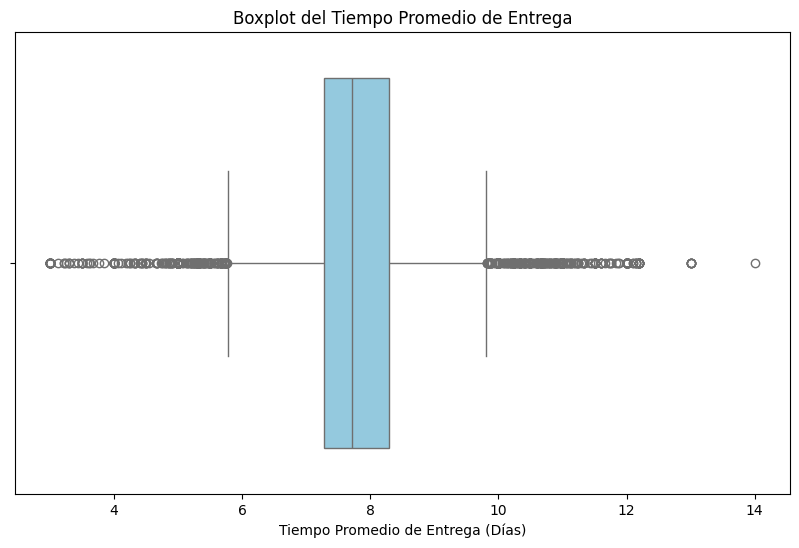

In [35]:
# Boxplot para tiempos de entrega
plt.figure(figsize=(10, 6))
sns.boxplot(data=LT_summary, x="Avg_LT_inDays", color="skyblue")
plt.title("Boxplot del Tiempo Promedio de Entrega")
plt.xlabel("Tiempo Promedio de Entrega (Días)")
plt.show()

In [36]:
# El gráfico de caja muestra la distribución de los plazos de entrega promedio de los productos. 
# La mayoría de los productos tienen un plazo de entrega promedio de aproximadamente 7 u 8 días, 
# como lo muestra la distribución normal. Por lo tanto, la mayoría de los vendedores entregan los 
# productos en el plazo de una semana.

Riesgo
Riesgo Medio    10470
Riesgo Bajo       193
Name: count, dtype: int64


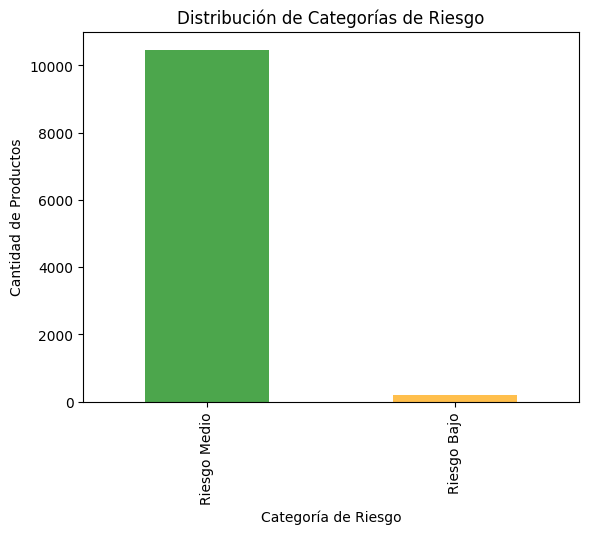

In [37]:
# Clasificar productos según tiempo máximo de entrega
def categorize_lead_time(max_lt):
    if max_lt <= 5:
        return "Riesgo Bajo"
    elif 5 < max_lt <= 15:
        return "Riesgo Medio"
    else:
        return "Riesgo Alto"

LT_summary['Riesgo'] = LT_summary['Max_LT_inDays'].apply(categorize_lead_time)

# Ver distribución de categorías de riesgo
risk_distribution = LT_summary['Riesgo'].value_counts()
print(risk_distribution)

# Gráfico de barras para distribución de riesgo
risk_distribution.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title("Distribución de Categorías de Riesgo")
plt.xlabel("Categoría de Riesgo")
plt.ylabel("Cantidad de Productos")
plt.show()

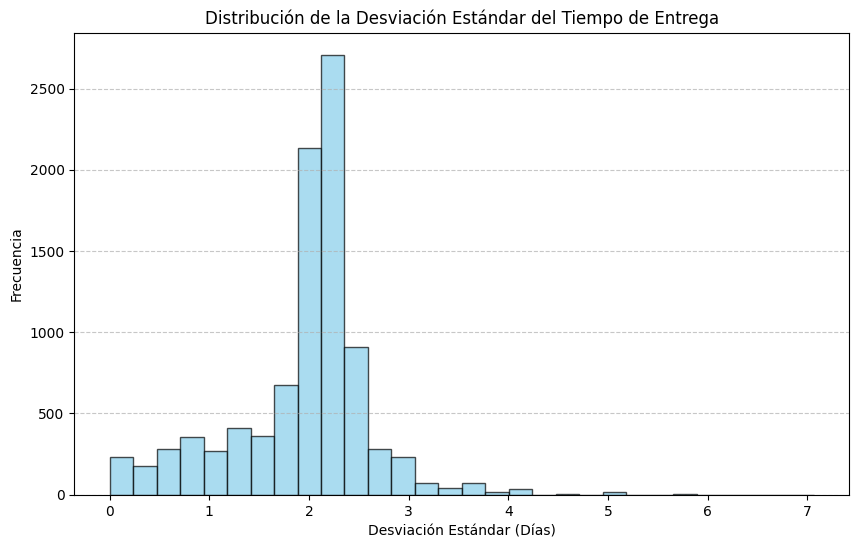

In [38]:
# Calcular desviación estándar del tiempo de entrega
LT_summary['Std_LT_inDays'] = purchases_f.groupby(['Brand', 'Description'])['Lead_Time'].std().round(2).reset_index(drop=True)

# Calcular proporción de pedidos entregados en menos de X días (por ejemplo, 7 días)
LT_summary['On_Time_Rate'] = purchases_f.groupby(['Brand', 'Description']).apply(
    lambda group: (group['Lead_Time'] <= 7).mean(), include_groups=False
).round(2).reset_index(drop=True)

# Histograma de desviación estándar del tiempo de entrega
plt.figure(figsize=(10, 6))
plt.hist(LT_summary['Std_LT_inDays'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de la Desviación Estándar del Tiempo de Entrega")
plt.xlabel("Desviación Estándar (Días)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# Stock de seguridad e inventario disponible
# Como el stock de seguridad mide la cantidad de inventario de reserva que se debe tener, se debe
# determinar el stock de seguridad óptimo en función de la cantidad de ventas 
# y la cantidad de stock de seguridad necesaria para que las ventas se realicen sin problemas.

In [40]:
# Convertir SalesDate a formato datetime
sales_f['SalesDate'] = pd.to_datetime(sales_f['SalesDate'], errors='coerce')

# Realizar el resumen de ventas
sales_f_summary = sales_f.groupby(['Brand', 'Description']).agg(
                        Max_Sales_Qty=("SalesQuantity", 'max'),
                        Min_Sales_Qty=("SalesQuantity", 'min'),
                        Tot_SalesQty=('SalesQuantity', 'sum')).reset_index()

# Calcular las ventas por día de cada producto agrupado por marca
total_sales_days = (sales_f['SalesDate'].max() - sales_f['SalesDate'].min()).days
sales_f_summary['Avg_Sales/Day'] = (sales_f_summary['Tot_SalesQty'] / total_sales_days).round(2)

# Unir el tiempo de entrega y los datos de ventas
Safty_stock = pd.merge(sales_f_summary, LT_summary, on = ["Brand", "Description"])

# Calcular el stock de seguridad óptimo y stock máximo necesario
Safty_stock["Optimal_SS"] = np.ceil(Safty_stock["Avg_LT_inDays"] * Safty_stock["Avg_Sales/Day"]).round(0)
Safty_stock["Max_SS"] = np.ceil(Safty_stock["Max_LT_inDays"] * Safty_stock["Avg_Sales/Day"]).round(0)

# Identificar outliers en las ventas
q1 = sales_f_summary['Avg_Sales/Day'].quantile(0.25)
q3 = sales_f_summary['Avg_Sales/Day'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

# Filtrar productos sin outliers
filtered_data = sales_f_summary[
    (sales_f_summary['Avg_Sales/Day'] >= outlier_threshold_low) &
    (sales_f_summary['Avg_Sales/Day'] <= outlier_threshold_high)
]

# Verificar los resultados
print(sales_f_summary.head())


   Brand                  Description  Max_Sales_Qty  Min_Sales_Qty  \
0     58  Gekkeikan Black & Gold Sake              7              1   
1     60       Canadian Club 1858 VAP              3              1   
2     61        Margaritaville Silver             12             12   
3     62     Herradura Silver Tequila              3              1   
4     63   Herradura Reposado Tequila              4              1   

   Tot_SalesQty  Avg_Sales/Day  
0           288           4.88  
1           124           2.10  
2            24           0.41  
3           162           2.75  
4           131           2.22  


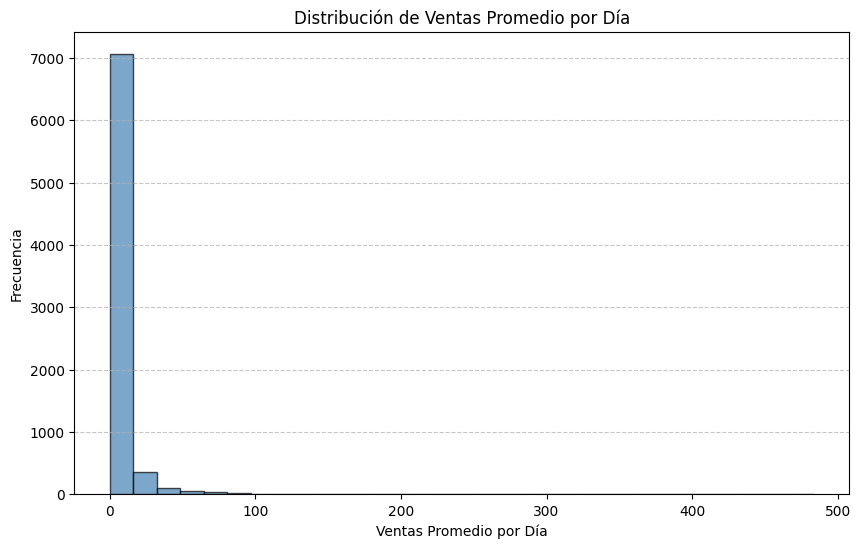

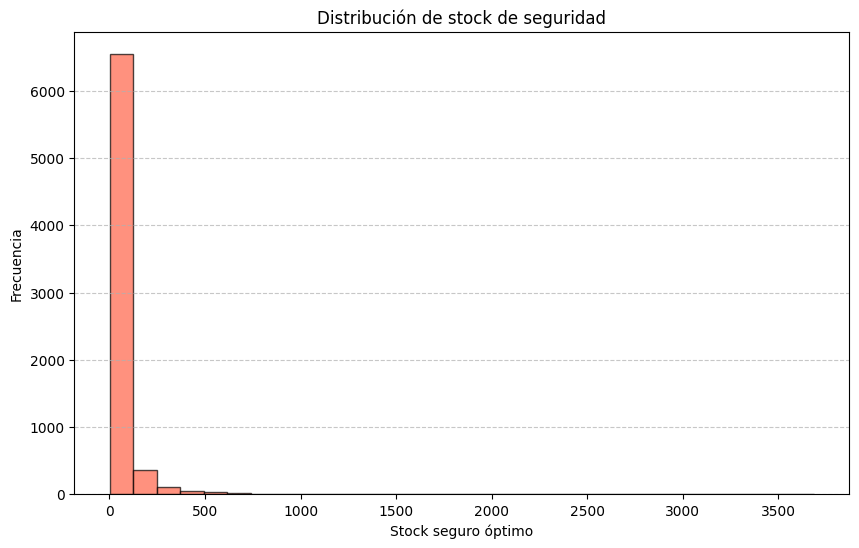

In [41]:
# Histograma de ventas promedio por día
plt.figure(figsize=(10, 6))
plt.hist(sales_f_summary['Avg_Sales/Day'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de Ventas Promedio por Día")
plt.xlabel("Ventas Promedio por Día")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma de distribución óptima del stock seguro
plt.figure(figsize=(10, 6))
plt.hist(Safty_stock['Optimal_SS'], bins=30, color='tomato', edgecolor='black', alpha=0.7)
plt.title("Distribución de stock de seguridad")
plt.xlabel("Stock seguro óptimo")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Los histogramas representan el recuento de stock de seguridad requerido para cada marca 
# junto con sus ventas diarias promedio.
# Sin embargo, debido a que los datos están muy sesgados hacia la izquierda, la distribución 
# de los puntos de datos en el lado derecho no es claramente visible.

# Para poder visualizar esto mejor, utilizaremos un diagrama de caja.

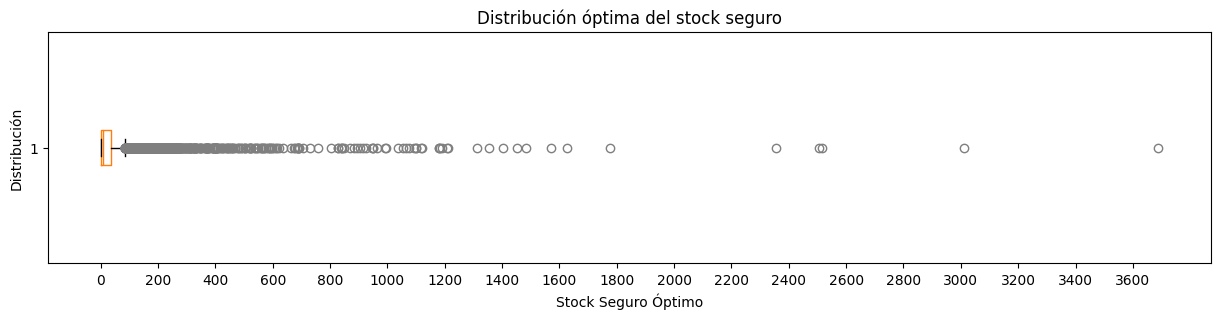

In [43]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.boxplot(Safty_stock['Optimal_SS'], vert=False, boxprops=dict(color='tab:orange'),  
                            flierprops=dict(markeredgecolor='tab:gray'))
ax.set_xticks(range(0, int(Safty_stock["Optimal_SS"].max()) + 1, 200)) 
ax.set_title('Distribución óptima del stock seguro')
ax.set_xlabel('Stock Seguro Óptimo')
ax.set_ylabel('Distribución')
plt.show()